In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
%matplotlib inline
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, explained_variance_score
from sklearn.metrics import mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance, max_error

df = pd.read_csv("pred_1.csv")
df


,Date,x,y,bool,pred,p_bool,right
0,2021-03-15,1.505071,1.453745,0,1.539348,1,False
1,2021-03-16,1.453745,1.464171,1,1.479292,1,True
2,2021-03-17,1.464171,1.361520,0,1.445468,0,True
3,2021-03-18,1.361520,1.348689,0,1.441109,1,False
4,2021-03-19,1.348689,1.325432,0,1.367157,1,False
...,...,...,...,...,...,...,...
124,2021-09-09,1.317356,1.312813,0,1.376919,1,False
125,2021-09-10,1.312813,1.370217,1,1.373569,1,True
126,2021-09-13,1.370217,1.337592,0,1.377819,1,False
127,2021-09-14,1.337592,1.413580,1,1.410899,1,True


In [2]:
def adjusted_r2(y_test, y_pred, n_features):
  adj_r2 = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (len(y_test) - n_features - 1))
  return adj_r2


print("MSE = " + str(mean_squared_error(df['y'], df['pred'])))
print("RMSE = " + str(mean_squared_error(df['y'], df['pred'], squared=False)))
print("MAPE = " + str(mean_absolute_percentage_error(df['y'], df['pred']) * 100))
print("R2 = " + str(r2_score(df['y'], df['pred'])))
print("adjust R2 = " + str(adjusted_r2(df['y'], df['pred'], 105)))
print("RMSLE = " + str(mean_squared_log_error(df['y'], df['pred'])))
print("explained_variance_score = " + str(explained_variance_score(df['y'], df['pred'])))
print("mean_poisson_deviance = " + str(mean_poisson_deviance(df['y'], df['pred'])))
print("mean_gamma_deviance = " + str(mean_gamma_deviance(df['y'], df['pred'])))
print("mean_tweedie_deviance = " + str(mean_tweedie_deviance(df['y'], df['pred'])))
print("max_error = " + str(max_error(df['y'], df['pred'])))


print("\n")
print(df['right'].value_counts(normalize=True) * 100)
print(df['right'].value_counts())

MSE = 0.002662701461647158
RMSE = 0.051601370734188426
MAPE = 2.8631136983872634
R2 = 0.8009379206892412
adjust R2 = -0.10782374572944042
RMSLE = 0.00044071728748493985
explained_variance_score = 0.8017828233381552
mean_poisson_deviance = 0.0018263196734216048
mean_gamma_deviance = 0.0012591866777017075
mean_tweedie_deviance = 0.002662701461647158
max_error = 0.14913570152778566


True     52.713178
False    47.286822
Name: right, dtype: float64
True     68
False    61
Name: right, dtype: int64


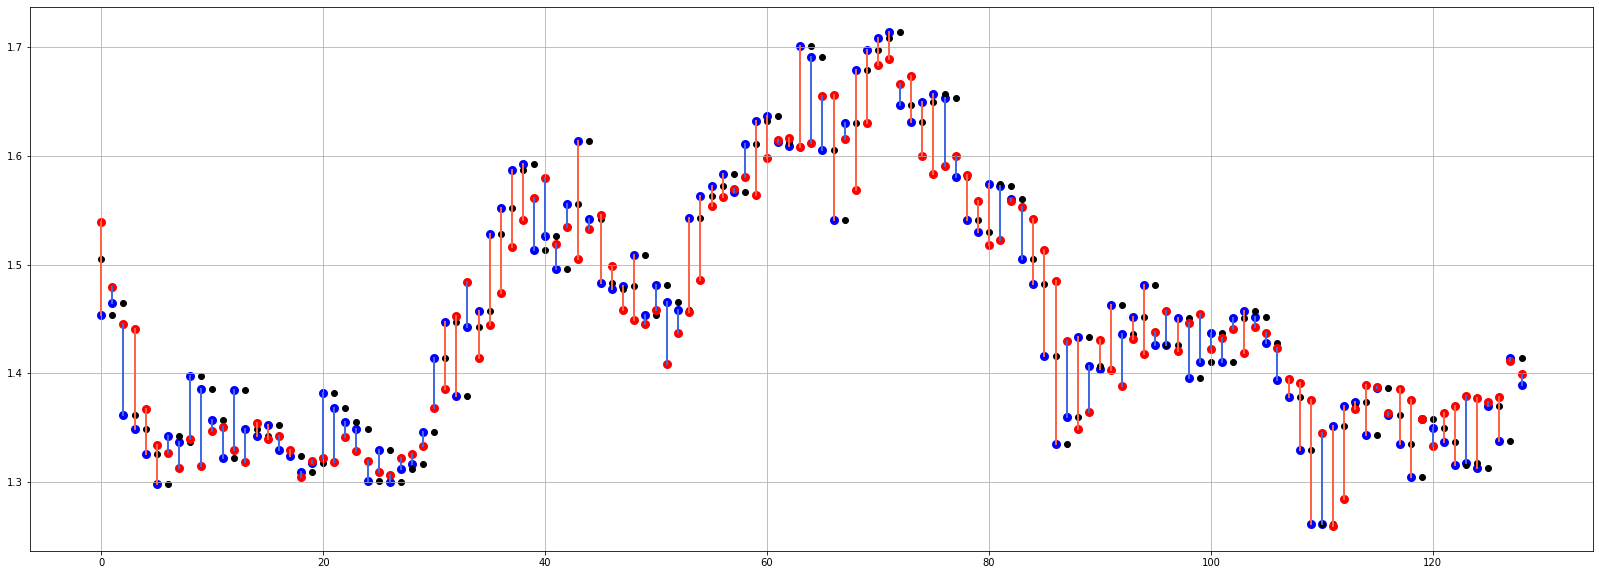

In [3]:
plt.figure(figsize=(28, 10))

for i, val in df.iterrows():
    color = 'royalblue' if val[6] else 'tomato'
    plt.plot([i, i], [val[2], val[4]], label = "pred", linewidth=2, color=color)
    plt.scatter(i, val[2], label = "pred", linewidth=3, color='blue') # final 
    plt.scatter(i, val[1], label = "pred", linewidth=1, color='k') # inicio
    plt.scatter(i, val[4], label = "pred", linewidth=3, color='red') # valor esperado / pred

plt.grid(True)
plt.show()

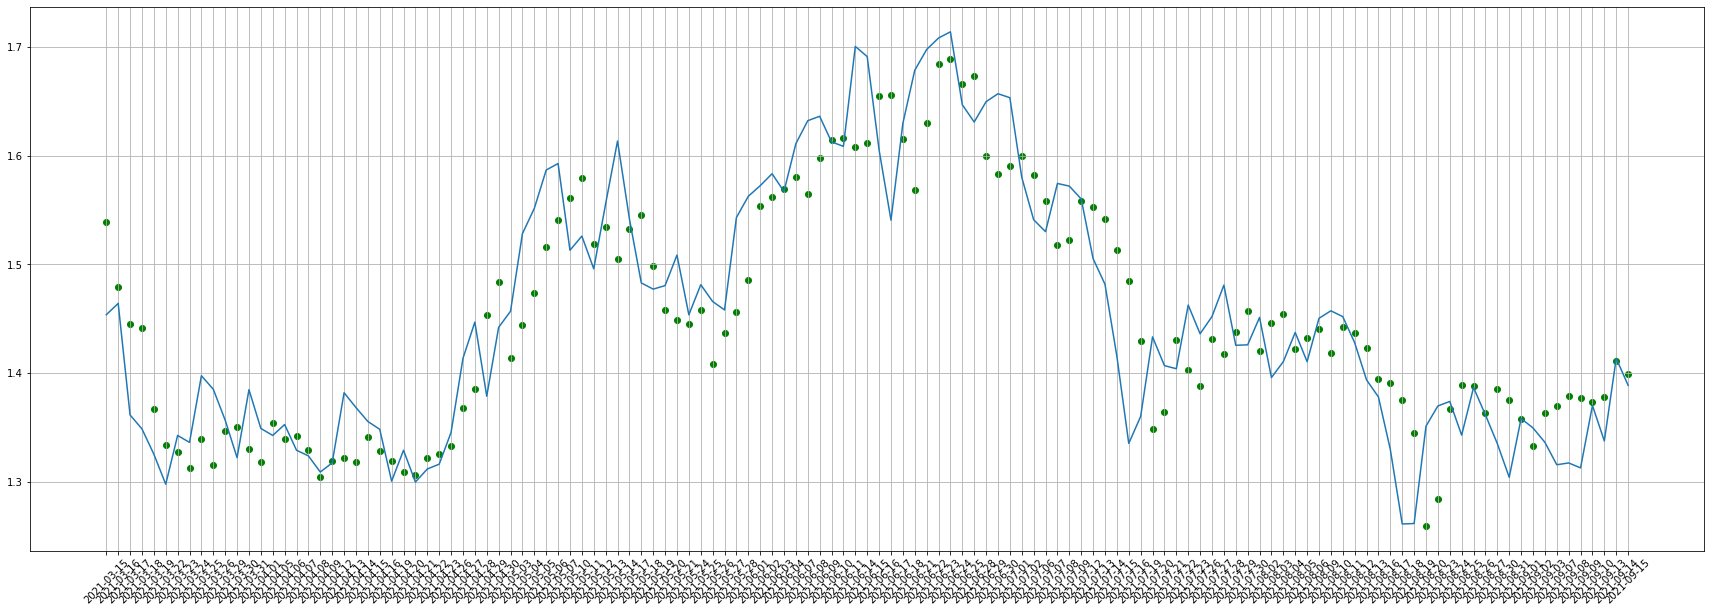

In [4]:
plt.figure(figsize=(30, 10))

plt.plot(df['Date'], df.y, label = "y")
plt.scatter(df['Date'], df.pred, label = "pred", color='green')
plt.grid(True)
plt.xticks(rotation=45) 

plt.show()